In [7]:
%pip install matplotlib
%pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


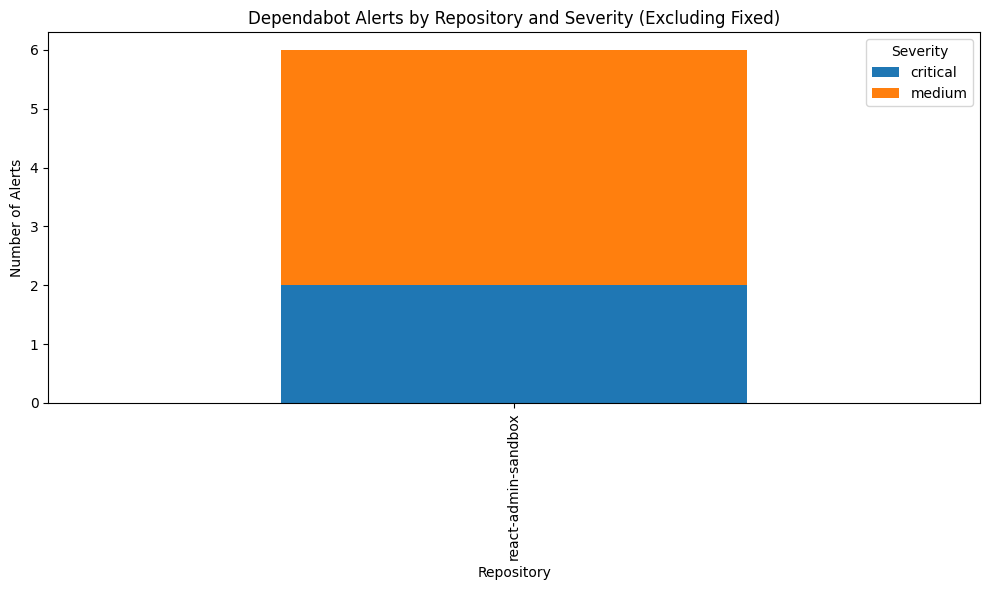

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV ファイルの読み込み
csv_file = "../dependabot_alerts.csv"
df = pd.read_csv(csv_file)

# "fixed" 状態のアラートを除外する
df_filtered = df[df["state"].str.lower() != "fixed"]

# リポジトリと severity 別に件数を集計
df_counts = df_filtered.groupby(["repo", "severity"]).size().reset_index(name="count")

# pivot table を作成（行: repo, 列: severity, 値: count）
pivot = df_counts.pivot(index="repo", columns="severity", values="count").fillna(0)

# スタックドバーグラフの作成
ax = pivot.plot(kind="bar", stacked=True, figsize=(10, 6))

plt.xlabel("Repository")
plt.ylabel("Number of Alerts")
plt.title("Dependabot Alerts by Repository and Severity (Excluding Fixed)")
plt.legend(title="Severity")
plt.tight_layout()
plt.show()

In [ ]:


# CSV file path
csv_file = "dependabot_alerts.csv"
# Read CSV
df = pd.read_csv(csv_file)
# Group by repo and severity, counting alerts
grouped = df.groupby(["repo", "severity"]).size().reset_index(name="count")
# Plotting: Use seaborn to create a color-coded bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x="repo", y="count", hue="severity")
plt.title("Number of Dependabot Alerts by Repo and Severity")
plt.xlabel("Repository")
plt.ylabel("Alert Count")
plt.legend(title="Severity")
plt.tight_layout()
plt.show()